<a href="https://colab.research.google.com/github/roxyconstantine-dev/Proyecto-Final-de-An-lisis-Datos/blob/main/borrador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import pandas as pd
import numpy as np

from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV, learning_curve

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
import math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import uniform
import statistics as stats
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Chapter 4&5
from sklearn.decomposition import PCA

# Chapter 6
from sklearn.decomposition import IncrementalPCA

# Chapter 7
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_swiss_roll

from mpl_toolkits.mplot3d import Axes3D
#from pydiffmap import diffusion_map as dm
#from pydiffmap.visualization import data_plot

# Chapter 8
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import plotly.express as px 
import pandas as pd
url="https://github.com/roxyconstantine-dev/Proyecto-Final-de-An-lisis-Datos/blob/main/Peliculas.xlsx?raw=true"
datos=pd.read_excel(url)
datos1 = datos.drop(datos.columns[[8,9,10,11,12,13,14,15,16]], axis='columns')
datos1

,Pelicula,Titulo,Clasificacion 1,Clasificacion 2,year,rating,imdbId,tmdbId
0,1,Toy Story,Animation,Children,1995,4.0,114709,862.0
1,2,Jumanji,Children,Fantasy,1995,4.0,113497,8844.0
2,3,Grumpier Old Men,Romance,no-genres-listed,1995,4.5,113228,15602.0
3,4,Waiting to Exhale,Drama,Romance,1995,2.5,114885,31357.0
4,5,Father of the Bride Part II,no-genres-listed,no-genres-listed,1995,4.5,113041,11862.0
...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic,Animation,Comedy,2017,5.0,5476944,432131.0
9738,193583,No Game No Life: Zero,Comedy,Fantasy,2017,4.0,5914996,445030.0
9739,193585,Flint,no-genres-listed,no-genres-listed,2017,4.0,6397426,479308.0
9740,193587,Bungo Stray Dogs: Dead Apple,Animation,no-genres-listed,2018,3.0,8391976,483455.0


In [114]:
datos1.isnull().sum()


Pelicula            0
Titulo              1
Clasificacion 1     0
Clasificacion 2     0
year               14
rating              0
imdbId              0
tmdbId              8
dtype: int64

In [115]:
datos1['year'].fillna(2000, inplace = True) 
clean_datos=datos1.dropna()
clean_datos.isnull().sum()

Pelicula           0
Titulo             0
Clasificacion 1    0
Clasificacion 2    0
year               0
rating             0
imdbId             0
tmdbId             0
dtype: int64

Si no sabemos el titilo de la pelicula de poco nos serviran el resto de datos,las peliculas sin años tambien pueden ser eliminadas.

In [116]:
text= {
    
  "Pelicula":{
    "0":129333,
    "1":129354,
    "2":129397,
    "3":129428,
    "4":129514,
    "5":129657
  },
  "Titulo":{
    "0":"Julia ",
    "1":"Focus ",
    "2":"Marvel One-Shot: Item 47 ",
    "3":"The Second Best Exotic Marigold Hotel ",
    "4":"George Carlin: It's Bad for Ya! ",
    "5":"Tracers "
  },
  "Clasificacion 1 ":{
    "0":"no-genres-listed",
    "1":"Thriller",
    "2":"Crime",
    "3":"Fantasy",
    "4":"Drama",
    "5":"no-genres-listed"
  },
  " Clasificacion 2":{
    "0":"no-genres-listed",
    "1":"no-genres-listed",
    "2":"Drama",
    "3":"Sci-Fi",
    "4":"no-genres-listed",
    "5":"no-genres-listed"
  },
  "year":{
     "0":2014,
    "1":2014,
    "2":2015,
    "3":2012,
    "4":2015,
    "5":2008
  },
  "rating":{
    "0":4.5,
    "1":5.0,
    "2":5.0,
    "3":4.5,
    "4":3.0,
    "5":4.5  
  },
  "imdbId":{
    "0":2392672	,
    "1":2582426	,
    "2":2381941	,
    "3":2247732	,
    "4":2555736	,
    "5":963207   
  },
  " tmdbId":{
    "0":179150,
    "1":278632,
    "2":256591,
    "3":119569,
    "4":268238,
    "5":13643	     
  }
}

pd.DataFrame(text)

,Pelicula,Titulo,Clasificacion 1,Clasificacion 2,year,rating,imdbId,tmdbId
0,129333,Julia,no-genres-listed,no-genres-listed,2014,4.5,2392672,179150
1,129354,Focus,Thriller,no-genres-listed,2014,5.0,2582426,278632
2,129397,Marvel One-Shot: Item 47,Crime,Drama,2015,5.0,2381941,256591
3,129428,The Second Best Exotic Marigold Hotel,Fantasy,Sci-Fi,2012,4.5,2247732,119569
4,129514,George Carlin: It's Bad for Ya!,Drama,no-genres-listed,2015,3.0,2555736,268238
5,129657,Tracers,no-genres-listed,no-genres-listed,2008,4.5,963207,13643


In [117]:
clean_datos.describe()

,Pelicula,rating,imdbId,tmdbId
count,9733.000000,9733.000000,9.733000e+03,9733.000000
mean,42212.894791,3.554968,6.775196e+05,55165.745402
std,52175.862076,1.037005,1.107632e+06,93657.611335
min,1.000000,0.500000,4.170000e+02,2.000000
25%,3249.000000,3.000000,9.518600e+04,9665.000000
50%,7299.000000,3.500000,1.674040e+05,16523.000000
75%,76293.000000,4.000000,8.055700e+05,44214.000000
max,193609.000000,5.000000,8.391976e+06,525662.000000


In [120]:
clean_datos.groupby("Clasificacion 1")['rating'].mean()

Clasificacion 1
Adventure           3.588525
Animation           3.569620
Children            3.677778
Comedy              3.521635
Crime               3.527108
Documentary         3.680000
Drama               3.601458
Fantasy             3.515444
Film-Noir           3.761905
Horror              3.475275
IMAX                3.900000
Musical             3.481013
Mystery             3.540816
Romance             3.552727
Sci-Fi              3.465190
Thriller            3.602515
War                 3.515625
Western             3.287037
no-genres-listed    3.542135
Name: rating, dtype: float64

In [121]:
clean_datos.groupby("Clasificacion 1")['Clasificacion 1'].count()

Clasificacion 1
Adventure            610
Animation            237
Children             270
Comedy               624
Crime                498
Documentary           50
Drama               1646
Fantasy              259
Film-Noir             42
Horror               364
IMAX                  10
Musical              158
Mystery              245
Romance              825
Sci-Fi               316
Thriller             517
War                  160
Western               54
no-genres-listed    2848
Name: Clasificacion 1, dtype: int64

In [122]:
#Agrupando la cantidad de peliculas por genero
h=["Adventure","Animation","Children","Comedy","Crime","Documentary","Drama","Fantasy","Film-Noir","Horror","IMAX","Musical","Mystery","Romance","Sci-Fi","Thriller","War","Western","no-genres-listed"] 
J=[]
for e in range(19):   
 J.append(clean_datos.apply(lambda x: x['Clasificacion 1'] == h[e], axis=1).sum())
print(J)

[610, 237, 270, 624, 498, 50, 1646, 259, 42, 364, 10, 158, 245, 825, 316, 517, 160, 54, 2848]


Text(0, 0.5, 'Cantidad de filmes por genero')

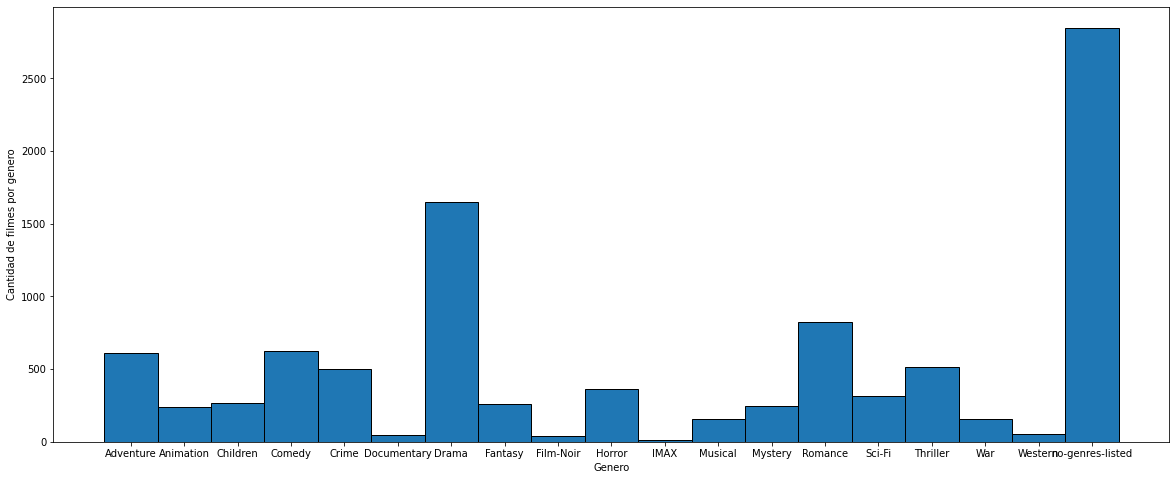

In [123]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plt.bar(x=h, height=J, width=1, edgecolor="black")
ax.set_xlabel('Genero')
ax.set_ylabel('Cantidad de filmes por genero')


In [124]:
#Codificando los generos cinematograficos para poderlos usar en la prediccion
GENERO_MAPEO = { "Adventure":1,"Animation":2,"Children":3,"Comedy":4,"Crime":5,"Documentary":6,"Drama":7,"Fantasy":8,"Film-Noir":9,"Horror":10,"IMAX":11,"Musical":12,"Mystery":13,"Romance":14,"Sci-Fi":15,"Thriller":16,"War":17,"Western":18,"no-genres-listed":0}
list_genero=clean_datos['Clasificacion 1']
list_genero= list_genero.map(GENERO_MAPEO).astype(int)
clean_datos['Clasificacion 1']=list_genero
clean_datos

<ipython-input-124-daba08004026>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Pelicula,Titulo,Clasificacion 1,Clasificacion 2,year,rating,imdbId,tmdbId
0,1,Toy Story,2,Children,1995,4.0,114709,862.0
1,2,Jumanji,3,Fantasy,1995,4.0,113497,8844.0
2,3,Grumpier Old Men,14,no-genres-listed,1995,4.5,113228,15602.0
3,4,Waiting to Exhale,7,Romance,1995,2.5,114885,31357.0
4,5,Father of the Bride Part II,0,no-genres-listed,1995,4.5,113041,11862.0
...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic,2,Comedy,2017,5.0,5476944,432131.0
9738,193583,No Game No Life: Zero,4,Fantasy,2017,4.0,5914996,445030.0
9739,193585,Flint,0,no-genres-listed,2017,4.0,6397426,479308.0
9740,193587,Bungo Stray Dogs: Dead Apple,2,no-genres-listed,2018,3.0,8391976,483455.0
